## Week 3 - Assignment 3 - Bag of Words Meets Bags of Popcorn

### Sentiment analysis

The task is to build a model that will determine the tone (positive, negative) of movie reviews. 

To do this, we will need to train the model on the existing data (train.tsv). The resulting model will have to determine the class (neutral, positive, negative) of new texts. The dataset contains the following fields:

| Field name | Meaning |
|------------|-----------|
| id  | id of review|
| sentiment | sentiment (1-positive, 0-negative)|
| review | text of the review |

Let's first of all have a look at the data

In [2]:
# Import pandas, numpy and the dataset, save it in a object called 'sentiment'
# Your code here
import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

display(train.head())
display(train.sample(5))

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


,id,sentiment,review
15526,"""6627_2""",0,"""What's happening to RGV? He seems to repeat h..."
12376,"""11025_7""",1,"""Cliffhanger is a decent action crime adventur..."
3532,"""11125_1""",0,"""Hey look, deal with it, there are much better..."
10321,"""5052_10""",1,"""This is an excellent movie. As a Canadian who..."
10596,"""1298_3""",0,"""Sogo Ishii can be a skilled filmmaker under t..."


In [3]:
print('SHAPE: ', train.shape)
print('FIRST REVIEW: ', train.review[0])

SHAPE:  (25000, 3)
FIRST REVIEW:  "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual fe

### Clean one review

In [4]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train.review[0])
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [5]:
import re
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [6]:
# normalize and split
lower_case = letters_only.lower()
words = lower_case.split()
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 

In [109]:
stop = stopwords.words('english')

In [8]:
# remove stop words form "words"
words = [w for w in words if not w in stopwords.words('english')]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

### Review cleaning function

In [9]:
stopwords_set = set(stopwords.words('english'))

def review_to_words(raw_review):
    # remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    
    # remove non-letters
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    
    # convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # remove stop words
    meaningful_words = [w for w in words if not w in stopwords_set]
    
    # join back 
    return(' '.join(meaningful_words))

In [10]:
# test with first review
clean_review = review_to_words(train.review[0])
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [12]:
num_reviews = train.review.size

clean_train_reviews = []

print('Parsing and cleaning in training set movie reviews...')
for i in range(0, num_reviews):
    if ((i+1) % 1000 == 0):
        print('Review %d of %d...' % (i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train.review[i]))

Parsing and cleaning in training set movie reviews...
Review 1000 of 25000...
Review 2000 of 25000...
Review 3000 of 25000...
Review 4000 of 25000...
Review 5000 of 25000...
Review 6000 of 25000...
Review 7000 of 25000...
Review 8000 of 25000...
Review 9000 of 25000...
Review 10000 of 25000...
Review 11000 of 25000...
Review 12000 of 25000...
Review 13000 of 25000...
Review 14000 of 25000...
Review 15000 of 25000...
Review 16000 of 25000...
Review 17000 of 25000...
Review 18000 of 25000...
Review 19000 of 25000...
Review 20000 of 25000...
Review 21000 of 25000...
Review 22000 of 25000...
Review 23000 of 25000...
Review 24000 of 25000...
Review 25000 of 25000...


We need a way of scoring the words such that words that appear in positive reviews have greater score that those that appear in negative reviews.

But first... how do we represent the reviews as vectors we can input to our algorithm?

### Bag of words

One thing we could do to represent the reviews as equal-sized vectors of numbers is the following:

* Create a list (vocabulary) with all the unique words in the whole corpus of reviews. 
* We construct a feature vector from each review that contains the counts of how often each word occurs in the particular review

_Note that since the unique words in each review represent only a small subset of all the words in the bag-of-words vocabulary, the feature vectors will mostly consist of zeros_

Lets construct the bag of words. We will work with a smaller example for illustrative purposes, and at the end we will work with our real data.

In [61]:
sample = [
    'This is amazing!',
    'ML is the best, yes it is',
    'I am not sure about how this is going to end...'
]

Let's import [CountVectorizer.](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) It'll help us to convert a collection of text documents to a matrix of token counts.

In [62]:
# Your code here
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
sample_features = vectorizer.fit_transform(sample)
sample_bag = sample_features.toarray()

In [67]:
sample_dict = vectorizer.get_feature_names()
print(sample_dict)

['about', 'am', 'amazing', 'best', 'end', 'going', 'how', 'is', 'it', 'ml', 'not', 'sure', 'the', 'this', 'to', 'yes']


In [68]:
# count:
from collections import Counter

counter = Counter()
for sentence in sample:
    for word in sentence.split():
        counter[word] += 1 
    
for item, count in counter.items():
    print(item, count)

This 1
is 4
amazing! 1
ML 1
the 1
best, 1
yes 1
it 1
I 1
am 1
not 1
sure 1
about 1
how 1
this 1
going 1
to 1
end... 1


In [69]:
# What is the index of the word 'is' and how many times it occurs in all three reviews?
index = sample_dict.index('is')
index
print([sample_bag[i][index] for i in range(3)])

[1, 2, 1]


### Apply on clean_train_reviews

In [70]:
vec = CountVectorizer()
train_data_features = vec.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()
print(train_data_features.shape)

(25000, 74047)


In [72]:
dict = vec.get_feature_names()
print('vocab size: ', len(dict))
print(dict[:5] + ['...'] + dict[-5:])

vocab size:  74047
['aa', 'aaa', 'aaaaaaah', 'aaaaah', 'aaaaatch', '...', 'zzzzzzzz', 'zzzzzzzzzzzzpop', 'zzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [75]:
vocab = Counter()
for review in clean_train_reviews:
    for word in review.split():
        vocab[word] += 1
    

As we can see from executing the preceding command, the vocabulary is stored in a Python array that maps the unique words to integer indices. Next, let's print the feature vectors that we just created:

In [76]:
vocab.most_common(5)

[('movie', 44031),
 ('film', 40147),
 ('one', 26788),
 ('like', 20274),
 ('good', 15140)]

Each index position in the feature vectors corresponds to the integer values that are stored as dictionary items in the CountVectorizer vocabulary. For example, the first feature at index position 0 resembles the count of the word 'about' , which only occurs in the last document. These values in the feature vectors are also called the **raw term frequencies**: `tf(t,d )` —the number of times a term `t` occurs in a document `d`.


### How relevant are words? Term frequency-inverse document frequency

We could use these raw term frequencies to score the words in our algorithm. There is a problem though: If a word is very frequent in _all_ documents, then it probably doesn't carry a lot of information. In order to tacke this problem we can use **term frequency-inverse document frequency**, which will reduce the score the more frequent the word is accross all twits. It is calculated like this:

\begin{equation*}
tf-idf(t,d) = tf(t,d) ~ idf(t,d)
\end{equation*}

_tf(t,d)_ is the raw term frequency descrived above. _idf(t,d)_ is the inverse document frequency, than can be calculated as follows:

\begin{equation*}
\log \frac{n_d}{1+df\left(d,t\right)}
\end{equation*}

where `n` is the total number of documents and _df(t,d)_ is the number of documents where the term `t` appears. 

The `1` addition in the denominator is just to avoid zero term for terms that appear in all documents, will not be entirely ignored. Ans the `log` ensures that low frequency term don't get too much weight.

Fortunately for us `scikit-learn` does all those calculations for us:

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

tfidf = TfidfTransformer()

# Formatting the number to 2 digits after the decimal point by showing on this notebook
np.set_printoptions(precision=2)

# Feed the tf-idf transformer with our previously created Bag of Words using fit_transform()
# Your code here
bag_1 = tfidf.fit_transform(train_data_features)
bag_1

<25000x74047 sparse matrix of type '<class 'numpy.float64'>'
	with 2443820 stored elements in Compressed Sparse Row format>

In [92]:
total_length = len(clean_train_reviews)
total_length

25000

In [99]:
# weight of 'amazing':

bag_2 = bag_1.toarray()
amazing_index = dict.index('amazing')
amazing_weight = [bag_2[i][amazing_index] for i in range(total_length)]
print('index of amazing: ', amazing_index)
print('weight of amazing: ')

index of amazing:  1879
weight of amazing: 


In [100]:
# not printing everything so that it looks readable on github preview
print(amazing_weight[:30] + ['...'] + amazing_weight[-30:])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08256324922211727, 0.0, 0.0, 0.0, 0.0, '...', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04991359380689481, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Removing special characters and "trash"

If you look closer, you'll see that we're also taking into consideration punctuation signs ('-', ',', etc) and other html tags like `&amp`. We can definitely remove them for the sentiment analysis, but we will try to keep the emoticons, since those _do_ have a sentiment load:

In [114]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
print(preprocessor(''))

We are almost ready! There is another trick we can use to reduce our vocabulary and consolidate words. If you think about it, words like: love, loving, etc. _Could_ express the same positivity. If that was the case, we would be  having two words in our vocabulary when we could have only one: lov. This process of reducing a word to its root is called **stemming**.

We also need a _tokenizer_ to break down our twits in individual words. We will implement two tokenizers, a regular one and one that does steaming:

In [115]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# write a function called `tokenizer()` that split a text into list of words
# Your code here
def tokenizer(text):
    return text.split()


# write a function named `tokenizer_porter()` that split a text into list of words and apply stemming technic
# Hint: porter.stem(word)
# Your code here
def tokenizer_porter(text):
    return [porter.stem(word) for word in tokenizer(text)]

# Testing
print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


## Training Logistic Regression

We are finally ready to train our algorythm. 

In [116]:
# split the dataset in train and test
y = train.sentiment
y
X = train.review.values
X
from sklearn.model_selection import train_test_split # to split the data into two parts\n
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stopwords_set,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preproc...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, predictions))

predict_proba = clf.predict_proba(X_test)

Accuracy: 0.8853333333333333


Finally, let's run some tests :-)

In [123]:
test_reviews = [
    "This is really bad",
    "I love this!",
    ":)",
    'An amazing blockbuster',
    'A terrible attempt that will never be a blockbuster'
]

preds = clf.predict_proba(test_reviews)

for i in range(len(test_reviews)):
    print(f'{test_reviews[i]} --> Negative, Positive = {preds[i]}')

This is really bad --> Negative, Positive = [1. 0.]
I love this! --> Negative, Positive = [0.02 0.98]
:) --> Negative, Positive = [0.19 0.81]
An amazing blockbuster --> Negative, Positive = [0.13 0.87]
A terrible attempt that will never be a blockbuster --> Negative, Positive = [0.94 0.06]


If we would like to use the classifier in another place, or just not train it again and again everytime, we can save the model in a pickle file:

In [125]:
import pickle
import os

pickle.dump(clf, open(os.path.join('./', 'logisticRegression.pkl'), 'wb'), protocol=4)

## Against testData.tsv

In [128]:
test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)
test_data.head()
# test data shape (25000, 2)
test_predictions = clf.predict(test_data.review)


### Save submission to CSV

In [149]:
test_data['sentiment'] = test_predictions

# change column order
output = test_data[['id', 'sentiment']]

# Now export testDataSubmission
import csv
output.to_csv('testDataSubmission.csv', index=False, quoting=csv.QUOTE_NONE)

In [150]:
# Test testDataSubmission.csv
test = pd.read_csv('testDataSubmission.csv')
test.head()

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,1
4,12128_7,1


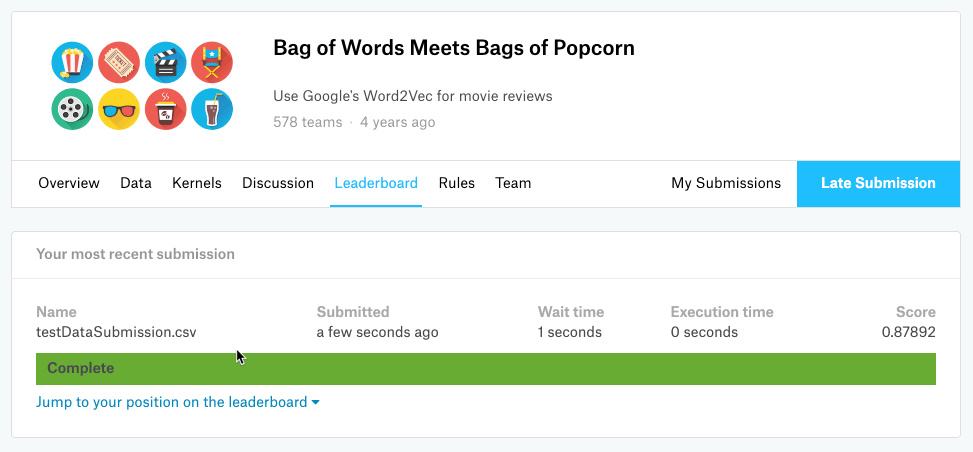

In [152]:
from IPython.display import Image
Image(filename="kaggle_submission.gif")